In [1]:
import os
import sys

# Importante, serve a fare in modo che il jupyter notebook possa vedere ed importare i file di libreria che creiamo in questa cartella.
sys.path.insert(0, '..')

In [2]:
# Pandas
import pandas as pd

# Valutatore del modello
import functions.evaluation as evaluation

# Funzioni di caricamento dati
import functions.load as load

# Modello
from sklearn.svm import SVR

In [3]:
# Carico il dataset
custom_df = pd.read_csv(r'../data/ridge_features_refined_data.csv')
custom_df.head()

,Lot_Area,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Exter_Qual,Bsmt_Qual,Bsmt_Exposure,BsmtFin_Type_1,Bsmt_Unf_SF,Total_Bsmt_SF,...,Central_Air_N,Central_Air_Y,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_Detchd,Garage_Type_No_Garage,Sale_Type_'WD ',Year_Sold,Mo_Sold,Sale_Price
0,-2.125439,7,5,0.292336,3,4,3,6,0.799868,0.339314,...,0,1,0,0,0,0,0,2006,3,0.015387
1,-2.123480,7,5,1.114337,3,4,4,6,0.847019,0.412956,...,0,1,0,0,0,0,1,2006,4,0.614236
2,-2.007543,8,5,0.628858,3,4,4,1,0.817310,0.356023,...,0,1,0,0,0,0,1,2006,5,0.631522
3,-2.173043,7,5,0.628858,3,4,3,6,0.098655,0.416660,...,0,1,0,0,0,0,1,2006,5,0.971735
4,-2.085350,7,5,0.334853,3,4,1,1,0.858377,0.420960,...,0,1,0,0,0,0,1,2006,5,0.178497


In [4]:
# Crea il modello di regressione basato su SVM
model = SVR()

# Definisco la griglia di iperparametri da provare
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.1, 1, 10, 100,500, 1000,2000, 3000, 4000, 5000,6000,7000,8000,9000,10000],
    'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1]
}

In [5]:
# Crea l'Evaluator per valutare il modello
ev = evaluation.Evaluator(model = model, df = custom_df, ylabel = 'Sale_Price')

In [6]:
# Trova quali sono i parametri migliori per il modello
best_params, best_score = ev.grid_search_cv(params=param_grid)
load.saveBestParameterModel(type(ev.model).__name__,best_params)

best_params, best_score

({'C': 10000, 'epsilon': 0.1, 'kernel': 'poly', 'model_name': 'SVR'},
 0.9311444037119813)

In [7]:
# Inseriamole in delle variabili per poterle usare con più semplicità
kernel = best_params['kernel']
c = best_params['C']
epsilon = best_params['epsilon']

In [8]:
# Costruisci il regressore basato su SVM con i migliori parametri trovati
SVMR = SVR(kernel=kernel,epsilon=epsilon,C=c)
SVMR

SVR(C=10000, kernel='poly')

In [9]:
# Creiamo l'Evaluator per valutare il modello con i parametri trovati
ev = evaluation.Evaluator(model = SVMR, df = custom_df, ylabel = 'Sale_Price')

# Fa splittare il dataset passato al valutatore (test_size = 0.20 di default)
ev.split_dataset()

In [10]:
# Valutiamo il modello secondo un Cross-Validation temporale
ev.temporal_cv(verbose=True).inline()

[Split 0/10] - train_size: 0.093
r2: 0.93718  -  explained_variance: 0.93932  -  rmse: 0.22841  -  mae: 0.14575  -  max_error: 0.77399

[Split 1/10] - train_size: 0.183
r2: 0.93297  -  explained_variance: 0.93300  -  rmse: 0.26391  -  mae: 0.16308  -  max_error: 1.24973

[Split 2/10] - train_size: 0.274
r2: 0.92057  -  explained_variance: 0.92318  -  rmse: 0.30403  -  mae: 0.14705  -  max_error: 1.54231

[Split 3/10] - train_size: 0.365
r2: 0.94008  -  explained_variance: 0.94263  -  rmse: 0.22639  -  mae: 0.14003  -  max_error: 0.89658

[Split 4/10] - train_size: 0.456
r2: 0.93386  -  explained_variance: 0.93799  -  rmse: 0.22903  -  mae: 0.12363  -  max_error: 0.83144

[Split 5/10] - train_size: 0.546
r2: 0.91275  -  explained_variance: 0.91416  -  rmse: 0.29779  -  mae: 0.14299  -  max_error: 1.09042

[Split 6/10] - train_size: 0.637
r2: 0.88978  -  explained_variance: 0.89042  -  rmse: 0.37131  -  mae: 0.15404  -  max_error: 3.22936

[Split 7/10] - train_size: 0.728
r2: 0.94478  - 

'r2: 0.92645  -  explained_variance: 0.92838  -  rmse: 0.26636  -  mae: 0.13945  -  max_error: 1.32095'

In [11]:
# Valutiamo il modello sul test set
ev.evaluate()

r2:                  0.89536
explained_variance:  0.89603
rmse:                0.32692
mae:                 0.14503
max_error:           4.00802

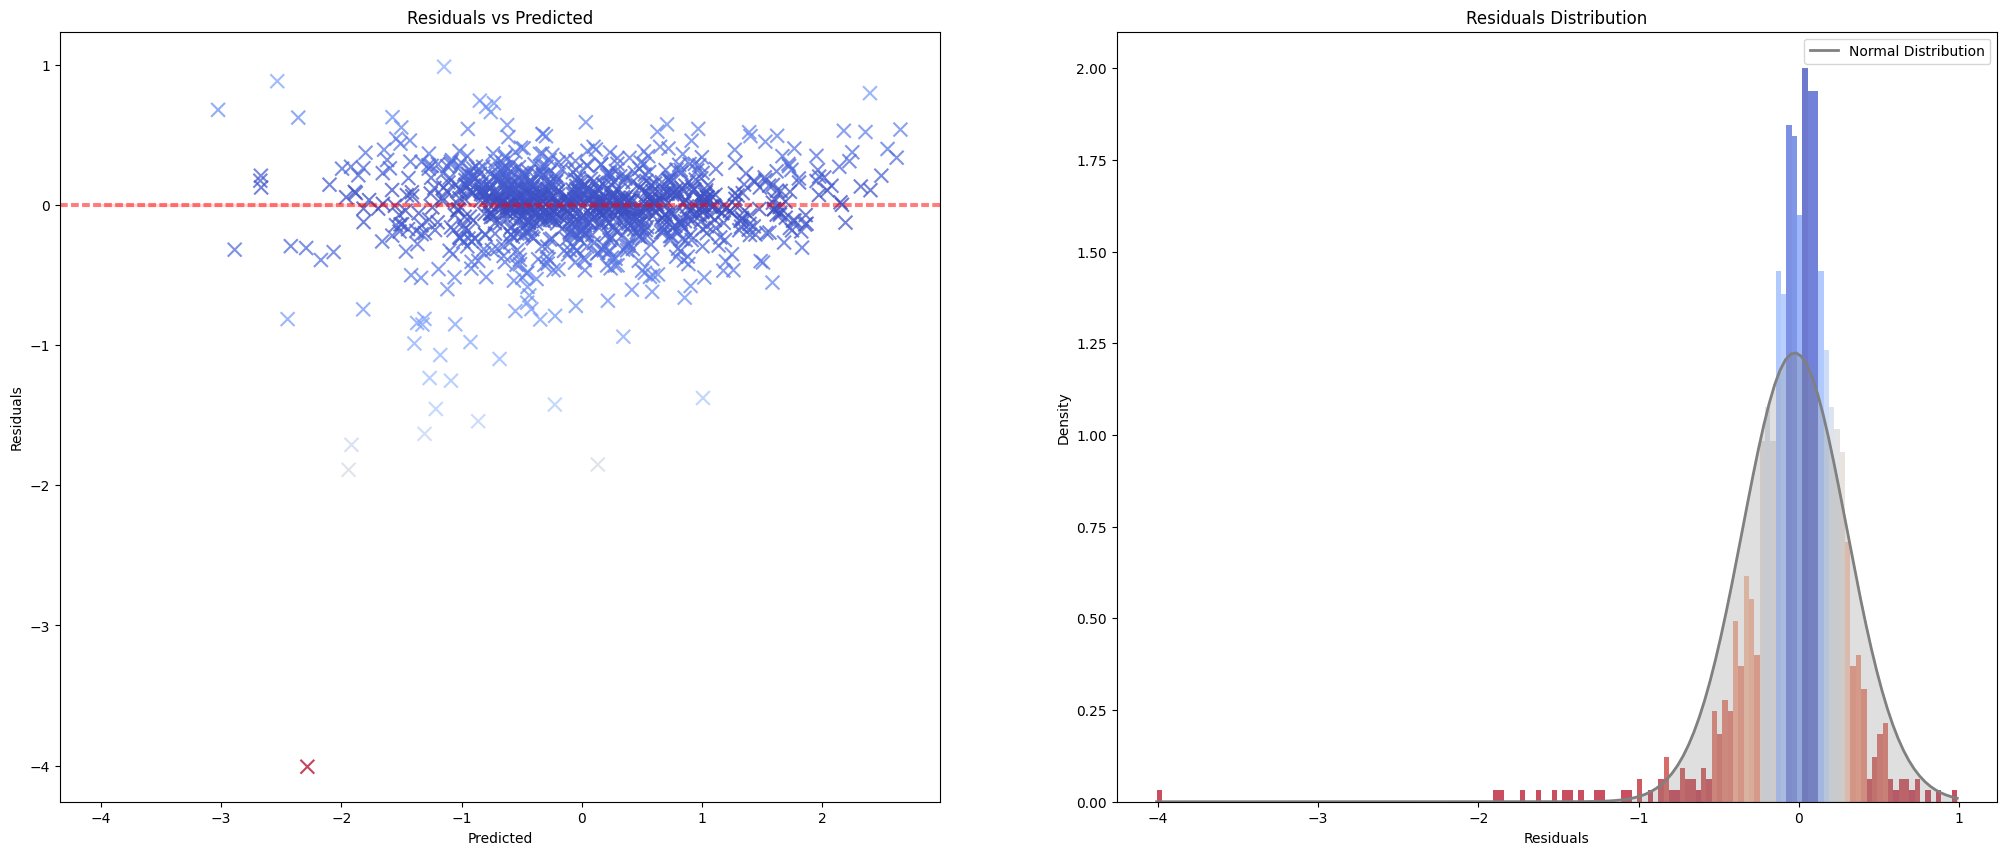

In [12]:
#Osseviamo i residui
ev.plot_residuals()